In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 1) Only Ranks 

In [4]:
classification_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'actor_2_name',
       'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'imdb_score',
       'movie_facebook_likes','director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes'])

In [5]:
classification_df

,duration,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,Biography,Comedy,Crime,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
0,123.0,22209,1.0,English,USA,PG-13,48000000.0,0,1,0,...,1,0,0,0,0,8,6,3,4,0.981155
1,88.0,2726,0.0,English,USA,PG,3500000.0,0,1,0,...,0,0,0,0,0,8,2,3,4,23.828571
2,104.0,1662,0.0,English,USA,R,4500000.0,0,0,0,...,0,0,1,0,0,7,3,3,3,13.078468
3,148.0,2566,1.0,English,USA,R,27000000.0,0,1,1,...,0,0,1,0,1,8,3,3,4,2.007407
4,98.0,14921,3.0,English,USA,R,6000000.0,0,1,0,...,0,0,0,0,1,7,7,3,5,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,17860,0.0,English,USA,R,35000000.0,0,1,0,...,0,0,0,0,0,7,5,3,4,1.579766
3848,100.0,18786,9.0,English,USA,R,20000000.0,0,1,0,...,0,0,0,0,0,7,5,5,5,2.773065
3849,92.0,2848,4.0,English,USA,R,5000000.0,0,1,0,...,0,0,0,0,0,5,2,4,4,2.335036
3850,81.0,3344,0.0,English,USA,PG-13,4900000.0,0,0,0,...,0,0,0,0,0,7,3,3,4,11.537962


## 1.1) All Movies

In [6]:
classification1_df=classification_df.drop(columns=['country','language'])
df1 = pd.get_dummies(classification1_df, columns=['content_rating'])
df1 = df1.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
df1 = df1[df1.gross_budget_ratio<=5]
df1

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0.981155,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2.007407,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0.100000,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1.546517,1,0,0
7,104.0,2442,0.0,6.500000e+06,0,0,0,0,1,1,...,0,0,8,2,3,4,4.907538,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0.940072,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1.579766,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2.773065,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2.335036,0,0,1


## 1.1.1) Without log and feature elimination

## 1.1.1.1) Seperating into 3 classes

In [7]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1     934
2     712
Name: gross_budget_ratio, dtype: int64

In [8]:
df11 = df1.copy()
df11['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [9]:
df11

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1,1,0,0
7,104.0,2442,0.0,6.500000e+06,0,0,0,0,1,1,...,0,0,8,2,3,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2,0,0,1


In [10]:
X = df11.drop(columns=['gross_budget_ratio'])
y = df11['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 22)
Dimensionality of X_test : (1063, 22)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.1.1.1) Multi-Class Logistic Regression

In [11]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [12]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 1, 'penalty': 'l2'}
MLR Train score: 0.5211161387631976
MLR Test score: 0.44967074317968014


Text(0.5, 1, 'Multiclass Logistic Regression')

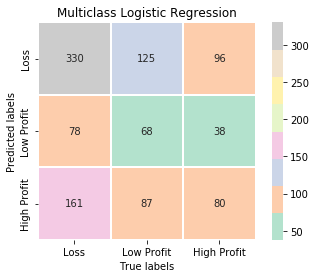

In [13]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.1.1.1.2) Decision Tree Classifier

In [14]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTC Train score: 0.5351089588377724
DTC Test score: 0.535277516462841


Text(0.5, 1, 'Decision Tree Classifier')

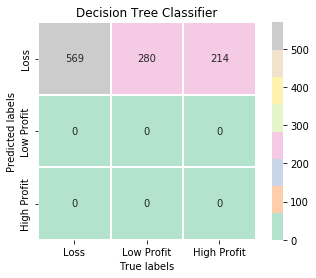

In [15]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.1.1.3) Random Forest Classifier

In [16]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.7623083131557707
RFC Test score: 0.5399811853245532


Text(0.5, 1, 'Random Forest Classifier')

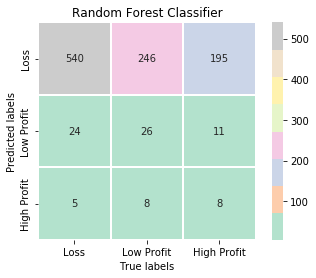

In [17]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.1.1.4) KNN Classifier

In [18]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [19]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5419693301049233
KNN Test score: 0.5456255879586077


Text(0.5, 1, 'KNN Classifier')

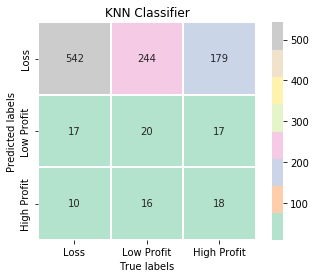

In [20]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.1.1.5) Gaussian Naive Bayes Classifier

In [21]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.4180790960451977
GNB Test score: 0.43650047036688616


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

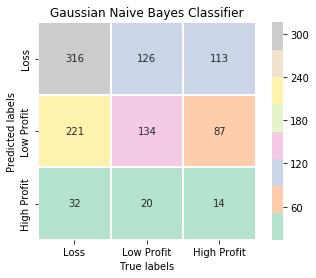

In [22]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.1.2) Seperating into 2 classes

In [23]:
RatioClass = df1['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1    1646
Name: gross_budget_ratio, dtype: int64

In [24]:
df12 = df1.copy()
df12['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [25]:
X = df12.drop(columns=['gross_budget_ratio'])
y = df12['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 22)
Dimensionality of X_test : (1063, 22)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.1.2.1) Logistic Regression

In [26]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 0.01, 'penalty': 'l1'}
LR Train score: 0.8491704374057315
LR Test score: 0.8400702987697716
LR Test Accuracy score: 0.5456255879586077


Text(0.5, 1, 'Logistic Regression')

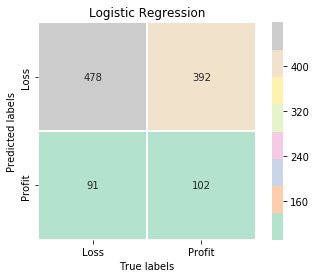

In [27]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.1.1.2.2) Decision Tree Classifier

In [28]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.5, 'min_samples_split': 0.001}
DTC Train score: 0.5369532428355958
DTC Test score: 0.5852372583479789
DTC Test Accuracy score: 0.5625587958607714


Text(0.5, 1, 'Decision Tree Classifier')

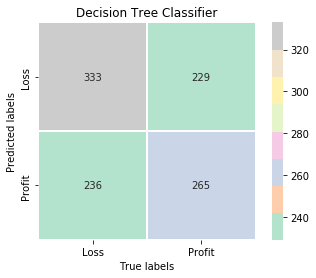

In [29]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.1.2.3) Random Forest Classifier

In [30]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.9411764705882353
RFC Test score: 0.7398945518453427
RFC Test Accuracy score: 0.6293508936970837


Text(0.5, 1, 'Random Forest Classifier')

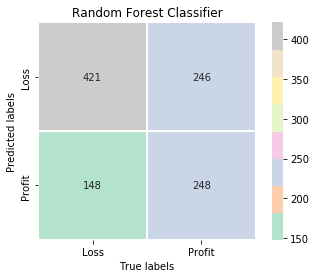

In [31]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.1.2.4) KNN Classifier

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.773001508295626
KNN Test score: 0.6924428822495606
KNN Test Accuracy score: 0.5776105362182502


Text(0.5, 1, 'KNN Classifier')

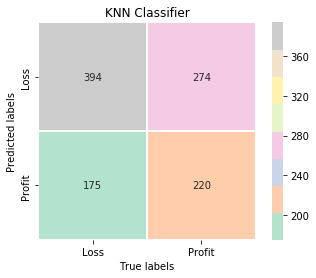

In [34]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.1.2.5) Gaussian Naive Bayes Classifier

In [35]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.4721549636803874
GNB Test score: 0.4619002822201317


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

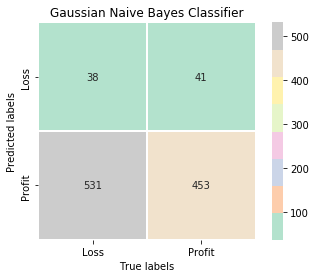

In [36]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.2) With taking log and feature elimination

### log

In [37]:
df2 = df1.copy()
df2['budget'] = np.log(df2['budget'])
df2['cast_total_facebook_likes'] = df2['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [38]:
df2.columns

Index(['duration', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'budget', 'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'director_rank',
       'actor1_rank', 'actor2_rank', 'actor3_rank', 'gross_budget_ratio',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [39]:
df2 = df2.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

## 1.1.2.1) Seperating into 3 classes

In [40]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1     934
2     712
Name: gross_budget_ratio, dtype: int64

In [41]:
df21 = df2.copy()
df21['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [42]:
df21

,duration,cast_total_facebook_likes,budget,Comedy,Drama,Romance,Family_Animation,Action_Adventure,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,10.008253,17.686712,1,0,1,0,0,0,8,6,3,4,0,0,1,0
3,148.0,7.850104,17.111347,1,0,0,0,1,1,8,3,3,4,2,0,0,1
5,124.0,7.287561,16.811243,1,0,0,0,0,1,5,3,2,3,0,1,0,0
6,124.0,7.888710,17.760281,0,1,0,0,0,1,7,3,4,4,1,1,0,0
7,104.0,7.800573,15.687313,0,0,1,0,0,0,8,2,3,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,8.797397,15.424948,0,1,0,0,0,0,7,4,3,4,0,0,1,0
3847,92.0,9.790319,17.370859,1,0,0,0,0,0,7,5,3,4,1,0,0,1
3848,100.0,9.840867,16.811243,1,0,0,0,0,0,7,5,5,5,2,0,0,1
3849,92.0,7.954372,15.424948,1,0,0,0,0,0,5,2,4,4,2,0,0,1


In [43]:
X = df21.drop(columns=['gross_budget_ratio'])
y = df21['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 16)
Dimensionality of X_test : (1063, 16)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.2.1.1) Multi-Class Logistic Regression

In [44]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [45]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.1, 'penalty': 'l2'}
MLR Train score: 0.5233785822021116
MLR Test score: 0.4393226716839135


Text(0.5, 1, 'Multiclass Logistic Regression')

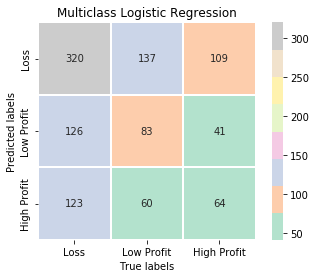

In [46]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.1.2.1.2) Decision Tree Classifier

In [47]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTC Train score: 0.5351089588377724
DTC Test score: 0.535277516462841


Text(0.5, 1, 'Decision Tree Classifier')

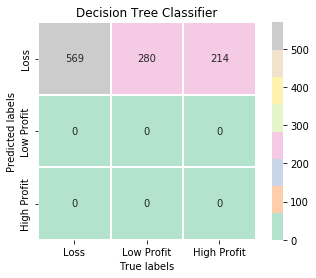

In [48]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.2.1.3) Random Forest Classifier

In [49]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.7732041969330105
RFC Test score: 0.5465663217309501


Text(0.5, 1, 'Random Forest Classifier')

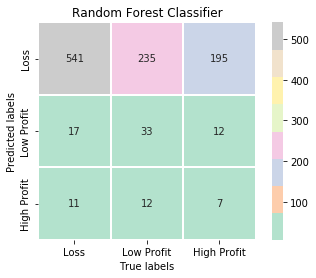

In [50]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.2.1.4) KNN Classifier

In [51]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [52]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5423728813559322
KNN Test score: 0.5371589840075258


Text(0.5, 1, 'KNN Classifier')

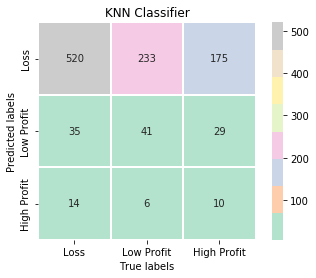

In [53]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.2.1.5) Gaussian Naive Bayes Classifier

In [54]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5080710250201775
GNB Test score: 0.51552210724365


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

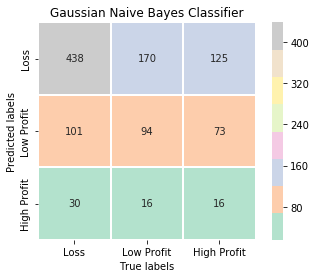

In [55]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.1.2.2) Seperating into 2 classes

In [56]:
RatioClass = df2['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1895
1    1646
Name: gross_budget_ratio, dtype: int64

In [57]:
df22 = df2.copy()
df22['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [58]:
X = df22.drop(columns=['gross_budget_ratio'])
y = df22['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2478, 16)
Dimensionality of X_test : (1063, 16)
Dimensionality of y_train: (2478,)
Dimensionality of y_test : (1063,)


### 1.1.2.2.1) Logistic Regression

In [59]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 0.001, 'penalty': 'l1'}
LR Train score: 1.0
LR Test score: 1.0
LR Test Accuracy score: 0.535277516462841


Text(0.5, 1, 'Logistic Regression')

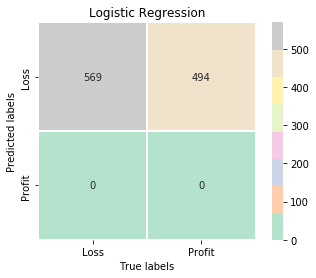

In [60]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.1.2.2.2) Decision Tree Classifier

In [61]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.5, 'min_samples_split': 0.001}
DTC Train score: 0.5369532428355958
DTC Test score: 0.5852372583479789
DTC Test Accuracy score: 0.5625587958607714


Text(0.5, 1, 'Decision Tree Classifier')

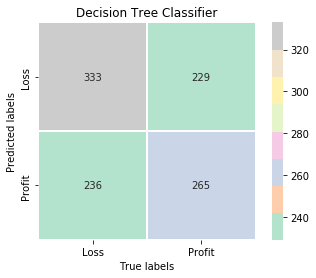

In [62]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.1.2.2.3) Random Forest Classifier

In [63]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
RFC Train score: 0.9177978883861236
RFC Test score: 0.6783831282952548
RFC Test Accuracy score: 0.6180620884289746


Text(0.5, 1, 'Random Forest Classifier')

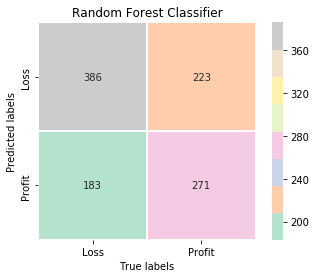

In [64]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.1.2.2.4) KNN Classifier

In [65]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [66]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7835595776772247
KNN Test score: 0.7100175746924429
KNN Test Accuracy score: 0.5766698024459078


Text(0.5, 1, 'KNN Classifier')

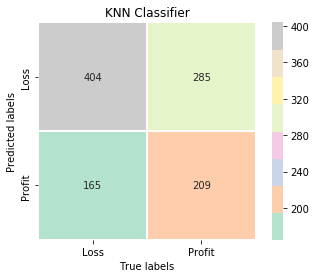

In [67]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.1.2.2.5) Gaussian Naive Bayes Classifier

In [68]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5803066989507667
GNB Test score: 0.5936030103480715


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

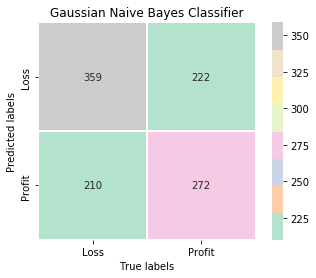

In [69]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2) Only US and UK Movies

In [70]:
classification2_df= classification_df.copy()
classification2_df = classification2_df[(classification2_df.country=='USA') | (classification2_df.country=='UK')]
classification2_df = classification2_df[(classification2_df.language=='English')]
classification2_df=classification2_df.drop(columns=['country','language'])
df3 = pd.get_dummies(classification2_df, columns=['content_rating'])
df3 = df3.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
df3 = df3[df3.gross_budget_ratio<=5]
df3

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0.981155,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2.007407,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0.100000,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1.546517,1,0,0
7,104.0,2442,0.0,6.500000e+06,0,0,0,0,1,1,...,0,0,8,2,3,4,4.907538,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0.940072,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1.579766,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2.773065,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2.335036,0,0,1


## 1.2.1) Without log and feature elimination

## 1.2.1.1) Seperating into 3 classes

In [71]:
RatioClass = df3['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1526
1     860
2     667
Name: gross_budget_ratio, dtype: int64

In [72]:
df31 = df3.copy()
df31['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [73]:
df31

,duration,cast_total_facebook_likes,facenumber_in_poster,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,...,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,22209,1.0,4.800000e+07,0,1,0,0,1,0,...,0,0,8,6,3,4,0,0,1,0
3,148.0,2566,1.0,2.700000e+07,0,1,1,0,0,0,...,0,1,8,3,3,4,2,0,0,1
5,124.0,1462,0.0,2.000000e+07,1,1,0,0,0,0,...,0,1,5,3,2,3,0,1,0,0
6,124.0,2667,0.0,5.166449e+07,1,0,0,1,0,0,...,0,1,7,3,4,4,1,1,0,0
7,104.0,2442,0.0,6.500000e+06,0,0,0,0,1,1,...,0,0,8,2,3,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,5.000000e+06,0,0,0,1,0,0,...,0,0,7,4,3,4,0,0,1,0
3847,92.0,17860,0.0,3.500000e+07,0,1,0,0,0,0,...,0,0,7,5,3,4,1,0,0,1
3848,100.0,18786,9.0,2.000000e+07,0,1,0,0,0,0,...,0,0,7,5,5,5,2,0,0,1
3849,92.0,2848,4.0,5.000000e+06,0,1,0,0,0,0,...,0,0,5,2,4,4,2,0,0,1


In [74]:
X = df31.drop(columns=['gross_budget_ratio'])
y = df31['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 22)
Dimensionality of X_test : (916, 22)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.1.1.1) Multi-Class Logistic Regression

In [75]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [76]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.001, 'penalty': 'none'}
MLR Train score: 0.5059300873907615
MLR Test score: 0.43777292576419213


Text(0.5, 1, 'Multiclass Logistic Regression')

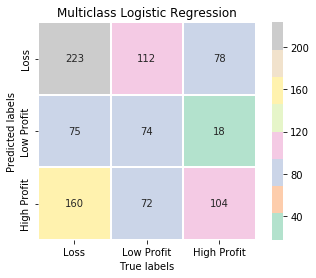

In [77]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.2.1.1.2) Decision Tree Classifier

In [78]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 0.025, 'min_samples_split': 0.001}
DTC Train score: 0.526906878802059
DTC Test score: 0.4672489082969432


Text(0.5, 1, 'Decision Tree Classifier')

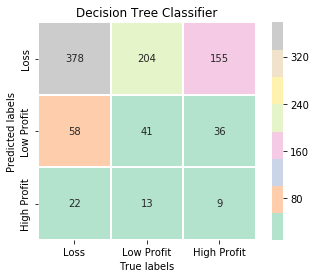

In [79]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.1.1.3) Random Forest Classifier

In [80]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
RFC Train score: 0.8034627983153955
RFC Test score: 0.5141921397379913


Text(0.5, 1, 'Random Forest Classifier')

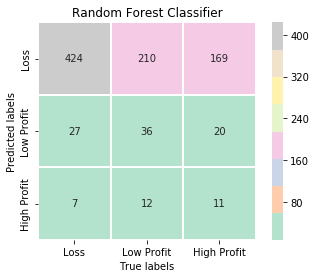

In [81]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.1.1.4) KNN Classifier

In [82]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [83]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 20}
KNN Train score: 0.5624707533926064
KNN Test score: 0.4814410480349345


Text(0.5, 1, 'KNN Classifier')

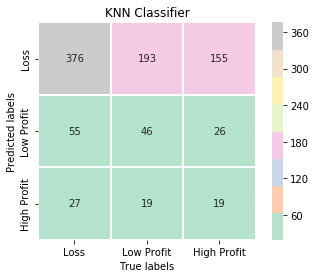

In [84]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.1.1.5) Gaussian Naive Bayes Classifier

In [85]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.4927468413664015
GNB Test score: 0.5032751091703057


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

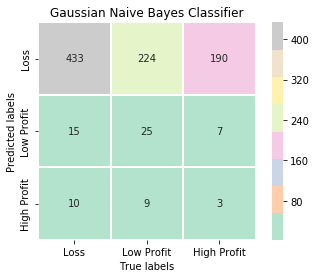

In [86]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.1.2) Seperating into 2 classes

In [87]:
RatioClass = df3['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1527
0    1526
Name: gross_budget_ratio, dtype: int64

In [88]:
df32 = df3.copy()
df32['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [89]:
X = df32.drop(columns=['gross_budget_ratio'])
y = df32['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 22)
Dimensionality of X_test : (916, 22)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.1.2.1) Logistic Regression

In [90]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 1000, 'penalty': 'l1'}
LR Train score: 0.6189138576779026
LR Test score: 0.5829694323144105
LR Test Accuracy score: 0.5720524017467249


Text(0.5, 1, 'Logistic Regression')

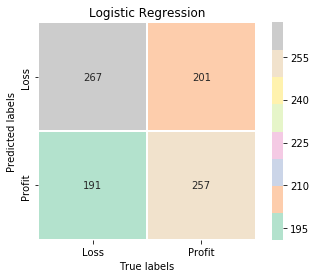

In [91]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.2.1.2.2) Decision Tree Classifier

In [92]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.05}
DTC Train score: 0.6863295880149812
DTC Test score: 0.5480349344978166
DTC Test Accuracy score: 0.5349344978165939


Text(0.5, 1, 'Decision Tree Classifier')

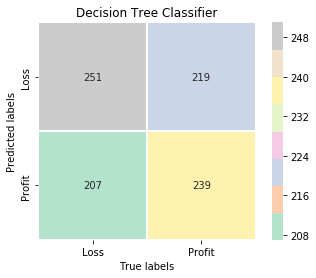

In [93]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.1.2.3) Random Forest Classifier

In [94]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}
RFC Train score: 1.0
RFC Test score: 0.6048034934497817
RFC Test Accuracy score: 0.5895196506550219


Text(0.5, 1, 'Random Forest Classifier')

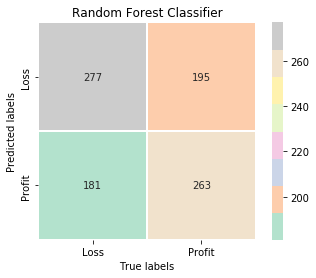

In [95]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.1.2.4) KNN Classifier

In [96]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [97]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7453183520599251
KNN Test score: 0.6528384279475983
KNN Test Accuracy score: 0.5578602620087336


Text(0.5, 1, 'KNN Classifier')

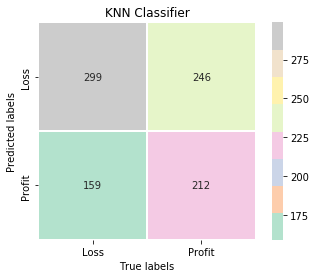

In [98]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.1.2.5) Gaussian Naive Bayes Classifier

In [99]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5128685072531586
GNB Test score: 0.5207423580786026


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

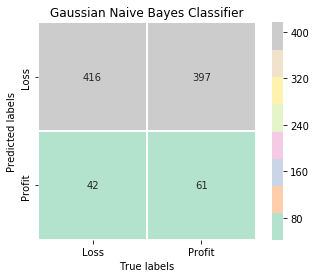

In [100]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.2) With taking log and feature elimination

### log

In [101]:
df4 = df3.copy()
df4['budget'] = np.log(df4['budget'])
df4['cast_total_facebook_likes'] = df4['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [102]:
df4.columns

Index(['duration', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'budget', 'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'director_rank',
       'actor1_rank', 'actor2_rank', 'actor3_rank', 'gross_budget_ratio',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [103]:
df4 = df4.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

## 1.2.2.1) Seperating into 3 classes

In [104]:
RatioClass = df4['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else (1 if x <= 2 else 2))
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

0    1526
1     860
2     667
Name: gross_budget_ratio, dtype: int64

In [105]:
df41 = df4.copy()
df41['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [106]:
df41

,duration,cast_total_facebook_likes,budget,Comedy,Drama,Romance,Family_Animation,Action_Adventure,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,10.008253,17.686712,1,0,1,0,0,0,8,6,3,4,0,0,1,0
3,148.0,7.850104,17.111347,1,0,0,0,1,1,8,3,3,4,2,0,0,1
5,124.0,7.287561,16.811243,1,0,0,0,0,1,5,3,2,3,0,1,0,0
6,124.0,7.888710,17.760281,0,1,0,0,0,1,7,3,4,4,1,1,0,0
7,104.0,7.800573,15.687313,0,0,1,0,0,0,8,2,3,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,8.797397,15.424948,0,1,0,0,0,0,7,4,3,4,0,0,1,0
3847,92.0,9.790319,17.370859,1,0,0,0,0,0,7,5,3,4,1,0,0,1
3848,100.0,9.840867,16.811243,1,0,0,0,0,0,7,5,5,5,2,0,0,1
3849,92.0,7.954372,15.424948,1,0,0,0,0,0,5,2,4,4,2,0,0,1


In [107]:
X = df41.drop(columns=['gross_budget_ratio'])
y = df41['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 16)
Dimensionality of X_test : (916, 16)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.2.1.1) Multi-Class Logistic Regression

In [108]:
smote=SMOTE('minority')
X_s, y_s = smote.fit_sample(X_train,y_train)
X_sm, y_sm = smote.fit_sample(X_s,y_s)
X_sm_train, y_sm_train = shuffle(X_sm, y_sm, random_state=10)

In [109]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l2','none']
parameters = {'C': C_List,'penalty':penalty}
MLR = LogisticRegression(multi_class='multinomial', solver='newton-cg')
clf1 = GridSearchCV(MLR, parameters, cv=5, verbose=0,scoring ='accuracy')
clf1.fit(X_sm_train, y_sm_train)

y_pred = clf1.predict(X_test)
print("MLR best parameters:", clf1.best_params_)
print("MLR Train score:", clf1.score(X_sm_train, y_sm_train))
print("MLR Test score:", clf1.score(X_test, y_test))

MLR best parameters: {'C': 0.1, 'penalty': 'l2'}
MLR Train score: 0.4959425717852684
MLR Test score: 0.45524017467248906


Text(0.5, 1, 'Multiclass Logistic Regression')

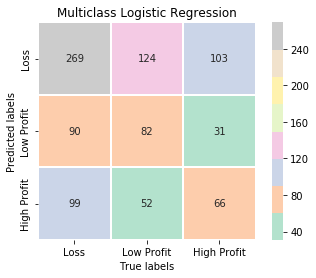

In [110]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Multiclass Logistic Regression')

### 1.2.2.1.2) Decision Tree Classifier

In [111]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))

DTC best parameters: {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.99}
DTC Train score: 0.49976602714085167
DTC Test score: 0.5


Text(0.5, 1, 'Decision Tree Classifier')

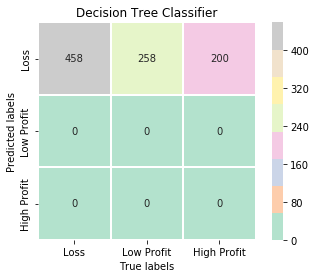

In [112]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.2.1.3) Random Forest Classifier

In [113]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}
RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
RFC Train score: 0.814225549836219
RFC Test score: 0.49672489082969434


Text(0.5, 1, 'Random Forest Classifier')

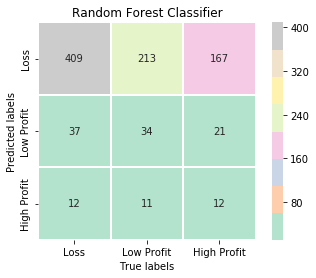

In [114]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.2.1.4) KNN Classifier

In [115]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [116]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring ='accuracy')
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))

KNN best parameters: {'n_neighbors': 50}
KNN Train score: 0.5329901731399158
KNN Test score: 0.4814410480349345


Text(0.5, 1, 'KNN Classifier')

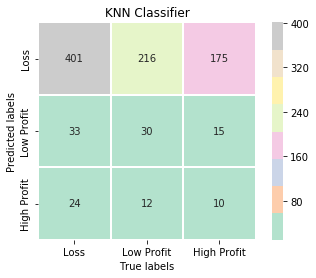

In [117]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.2.1.5) Gaussian Naive Bayes Classifier

In [118]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.4885353299017314
GNB Test score: 0.4759825327510917


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

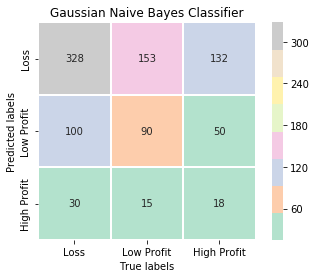

In [119]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Low Profit",'High Profit'])
ax.yaxis.set_ticklabels(["Loss","Low Profit",'High Profit'], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')

## 1.2.2.2) Seperating into 2 classes

In [120]:
RatioClass = df4['gross_budget_ratio'].transform(lambda x: 0 if x <= 1 else 1)
RatioClass = RatioClass.to_frame()
Counts=RatioClass['gross_budget_ratio'].value_counts()
Counts

1    1527
0    1526
Name: gross_budget_ratio, dtype: int64

In [121]:
df42 = df4.copy()
df42['gross_budget_ratio'] = RatioClass['gross_budget_ratio']

In [122]:
X = df42.drop(columns=['gross_budget_ratio'])
y = df42['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2137, 16)
Dimensionality of X_test : (916, 16)
Dimensionality of y_train: (2137,)
Dimensionality of y_test : (916,)


### 1.2.2.2.1) Logistic Regression

In [123]:
C_List = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']
parameters = {'C': C_List,'penalty':penalty}
LR = LogisticRegression( solver='liblinear')
clf1 = GridSearchCV(LR, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("LR best parameters:", clf1.best_params_)
print("LR Train score:", clf1.score(X_train, y_train))
print("LR Test score:", clf1.score(X_test, y_test))
print("LR Test Accuracy score:", accuracy_score(y_pred, y_test))

LR best parameters: {'C': 100, 'penalty': 'l1'}
LR Train score: 0.5973782771535581
LR Test score: 0.5873362445414847
LR Test Accuracy score: 0.5622270742358079


Text(0.5, 1, 'Logistic Regression')

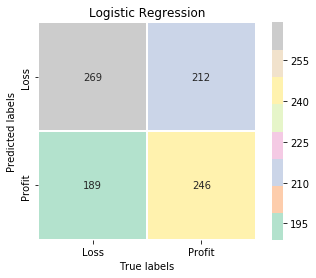

In [124]:
ax = plt.subplot()
Model_Predictions = clf1.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Logistic Regression')

### 1.2.2.2.2) Decision Tree Classifier

In [125]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTC = DecisionTreeClassifier(random_state=10)
clf2 = GridSearchCV(DTC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("DTC best parameters:", clf2.best_params_)
print("DTC Train score:", clf2.score(X_train, y_train))
print("DTC Test score:", clf2.score(X_test, y_test))
print("DTC Test Accuracy score:", accuracy_score(y_pred, y_test))

DTC best parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 0.005, 'min_samples_split': 0.05}
DTC Train score: 0.7059925093632958
DTC Test score: 0.6004366812227074
DTC Test Accuracy score: 0.5360262008733624


Text(0.5, 1, 'Decision Tree Classifier')

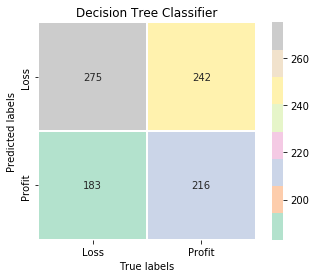

In [126]:
ax = plt.subplot()
Model_Predictions = clf2.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Decision Tree Classifier')

### 1.2.2.2.3) Random Forest Classifier

In [127]:
RFEstimatorList = [25,50,100,200]
criterion =['gini','entropy']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFC = RandomForestClassifier(random_state=10)
clf3 = GridSearchCV(RFC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)
print("RFC best parameters:", clf3.best_params_)
print("RFC Train score:", clf3.score(X_train, y_train))
print("RFC Test score:", clf3.score(X_test, y_test))
print("RFC Test Accuracy score:", accuracy_score(y_pred, y_test))

RFC best parameters: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 50}
RFC Train score: 1.0
RFC Test score: 0.6004366812227074
RFC Test Accuracy score: 0.5709606986899564


Text(0.5, 1, 'Random Forest Classifier')

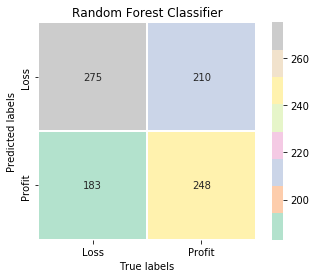

In [128]:
ax = plt.subplot()
Model_Predictions = clf3.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Random Forest Classifier')

### 1.2.2.2.4) KNN Classifier

In [129]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [130]:
Neighbor_List=[3,5,10,20,50]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
clf4 = GridSearchCV(KNNC, parameters, cv=5, verbose=0,scoring =make_scorer(recall_score,pos_label=0))
clf4.fit(X_train_scaled, y_train)

y_pred = clf4.predict(X_test_scaled)
print("KNN best parameters:", clf4.best_params_)
print("KNN Train score:", clf4.score(X_train_scaled, y_train))
print("KNN Test score:", clf4.score(X_test_scaled, y_test))
print("KNN Test Accuracy score:", accuracy_score(y_pred, y_test))

KNN best parameters: {'n_neighbors': 10}
KNN Train score: 0.7406367041198502
KNN Test score: 0.5982532751091703
KNN Test Accuracy score: 0.5185589519650655


Text(0.5, 1, 'KNN Classifier')

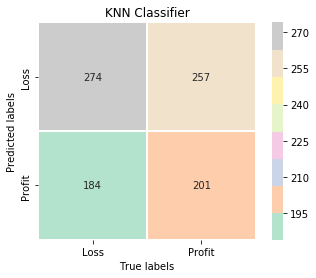

In [131]:
ax = plt.subplot()
Model_Predictions = clf4.predict(X_test_scaled)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('KNN Classifier')

### 1.2.2.2.5) Gaussian Naive Bayes Classifier

In [132]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
    
y_pred = GNB.predict(X_test)
print("GNB Train score:", GNB.score(X_train, y_train))
print("GNB Test score:", GNB.score(X_test, y_test))

GNB Train score: 0.5601310248011231
GNB Test score: 0.5698689956331878


Text(0.5, 1, 'Gaussian Naive Bayes Classifier')

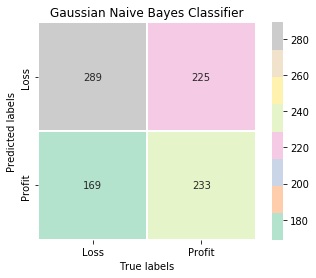

In [133]:
ax = plt.subplot()
Model_Predictions = GNB.predict(X_test)
Model_Confusion_Matrix = confusion_matrix(Model_Predictions,y_test)
sns.heatmap(Model_Confusion_Matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1,linecolor = "w",cmap = "Pastel2")
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.xaxis.set_ticklabels(["Loss","Profit"])
ax.yaxis.set_ticklabels(["Loss","Profit"], va="center")
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Gaussian Naive Bayes Classifier')